## **Machine Learning Diabetes Prediction**
The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, 
together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes 
and for this reason they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:
* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test*
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour insulin level(mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

*The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)*

**Source**
The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

### **Imports and configuration**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### **Read Data**

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
print(list(enumerate(data['Outcome'].value_counts().values)))

[(0, 500), (1, 268)]


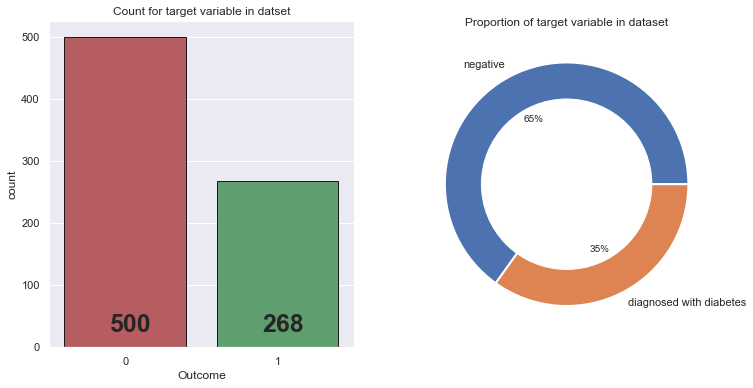

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(x = data['Outcome'],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(data['Outcome'].value_counts().values):
    ax.text(i-0.1,25,j,weight = "bold",fontsize = 25)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data['Outcome'].value_counts().values,
        labels=["negative","diagnosed with diabetes"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)

plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

### Missing Values

In [7]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[[
    'Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
listitem = []
for col in data.columns :
    listitem.append([col, data[col].dtype, data[col].isna().sum(),
                    round((data[col].isna().sum()/len(data[col]))*100,2),
                         data[col].nunique(), list(data[col].unique()[:2])]);
dfdesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data = listitem)
dfdesc      

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Pregnancies,int64,0,0.00,17,"[6, 1]"
1,Glucose,float64,5,0.65,135,"[148.0, 85.0]"
2,BloodPressure,float64,35,4.56,46,"[72.0, 66.0]"
3,SkinThickness,float64,227,29.56,50,"[35.0, 29.0]"
4,Insulin,float64,374,48.70,185,"[nan, 94.0]"
5,BMI,float64,11,1.43,247,"[33.6, 26.6]"
6,DiabetesPedigreeFunction,float64,0,0.00,517,"[0.627, 0.35100000000000003]"
7,Age,int64,0,0.00,52,"[50, 31]"
8,Outcome,int64,0,0.00,2,"[1, 0]"


In [8]:
listIndexNan = []
for i in range(len(data)):
    if (data.iloc[i].isna().sum() > 3):
        listIndexNan.append(i)
len(data.iloc[listIndexNan])

7

In [9]:
data.iloc[listIndexNan]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
706,10,115.0,NaN,NaN,NaN,NaN,0.261,30,1


There are seven datas with 50% of the feature are missing values. Try to fill the missing values may interfere with the model, so i decide to drop these seven rows.

In [10]:
data=data.dropna(thresh=6)
data.shape

(761, 9)

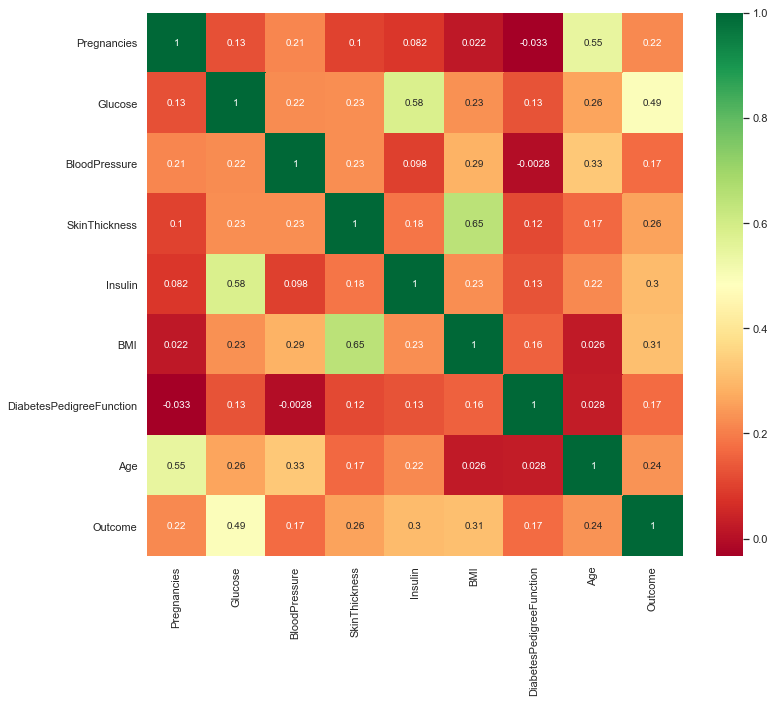

In [11]:
plt.figure(figsize=(12,10)) 
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 


### *1. Kolom Glucose*

In [12]:
data[data['Glucose'].isna()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


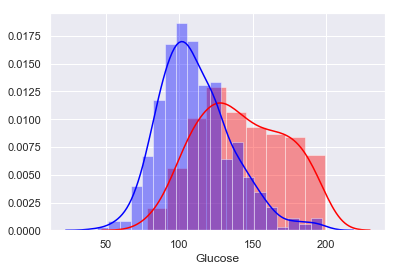

In [13]:
sns.distplot(data[data['Outcome']==1]['Glucose'].dropna(), color='red')
sns.distplot(data[data['Outcome']==0]['Glucose'].dropna(), color='blue')

In [14]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)

### *2. Kolom BloodPressure*

In [15]:
data[data['BloodPressure'].isna()==True].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1


In [16]:
# print(data.groupby('Age')['BloodPressure'].sum())
# print(data.groupby('Age')['Age','BloodPressure'].mean().head(10))
data.groupby('Age')['BloodPressure'].mean()[70]

82.0

In [17]:
def imput_bp(cols):
    age = cols['Age']
    bp = cols['BloodPressure']
    
    if pd.isnull(bp):
        return data.groupby('Age')['Age','BloodPressure'].mean().loc[age]['BloodPressure']
    else : 
        return bp
data['BloodPressure']=data.apply(imput_bp, axis=1)

In [18]:
data[data['BloodPressure'].isna()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0


In [19]:
data['BloodPressure'].fillna(data.groupby('Age')['BloodPressure'].mean()[70], inplace=True)

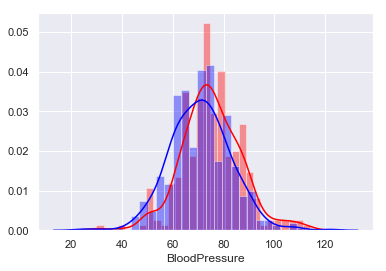

In [20]:
sns.distplot(data[data['Outcome']==1]['BloodPressure'], color='red', bins=30)
sns.distplot(data[data['Outcome']==0]['BloodPressure'], color='blue', bins=30)


### *3. Kolom BMI*

In [21]:
data[data['BMI'].isna()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [22]:
data.groupby('SkinThickness')['BMI'].mean().head(10)

SkinThickness
7.0     23.600000
8.0     24.950000
10.0    26.200000
11.0    25.083333
12.0    25.671429
13.0    22.954545
14.0    26.783333
15.0    26.878571
16.0    27.983333
17.0    26.385714
Name: BMI, dtype: float64

In [23]:
data[data['SkinThickness']==23]['BMI'].mean()
data['BMI'].mean()

32.45746367239099

In [24]:
data['BMI'].loc[145]=data[data['SkinThickness']==23]['BMI'].mean()
data['BMI'].loc[371]=data[data['SkinThickness']==23]['BMI'].mean()
data['BMI'].loc[9,684]=data['BMI'].mean()

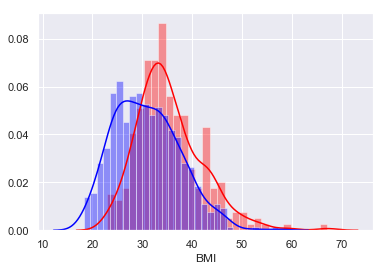

In [25]:
sns.distplot(data[data['Outcome']==1]['BMI'], color='red', bins=30)
sns.distplot(data[data['Outcome']==0]['BMI'], color='blue', bins=30)

In [26]:
data[data['BMI']>50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
193,11,135.0,75.0,NaN,NaN,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
303,5,115.0,98.0,NaN,NaN,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0


### *4. Kolom SkinThickness*

In [27]:
data[data['SkinThickness'].isna()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,NaN,NaN,23.300000,0.672,32,1
5,5,116.0,74.000000,NaN,NaN,25.600000,0.201,30,0
7,10,115.0,73.296296,NaN,NaN,35.300000,0.134,29,0
9,8,125.0,96.000000,NaN,NaN,32.455099,0.232,54,1
10,4,110.0,92.000000,NaN,NaN,37.600000,0.191,30,0
11,10,168.0,74.000000,NaN,NaN,38.000000,0.537,34,1
12,10,139.0,80.000000,NaN,NaN,27.100000,1.441,57,0
15,7,100.0,74.733333,NaN,NaN,30.000000,0.484,32,1
17,7,107.0,74.000000,NaN,NaN,29.600000,0.254,31,1
21,8,99.0,84.000000,NaN,NaN,35.400000,0.388,50,0


In [28]:
print(data['SkinThickness'].median())
print(data['SkinThickness'].mean())

29.0
29.153419593345657


In [29]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace = True)

In [30]:
data[data['SkinThickness']==99]
data['SkinThickness'].loc[579]=data['SkinThickness'].mean()

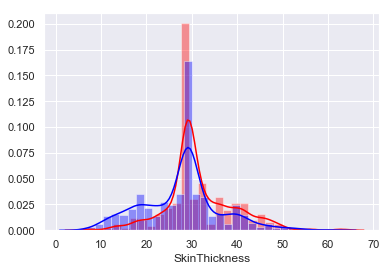

In [31]:
sns.distplot(data[data['Outcome']==1]['SkinThickness'], color='red', bins=30)
sns.distplot(data[data['Outcome']==0]['SkinThickness'], color='blue', bins=30)

### *5. Kolom Insulin*

In [32]:
data[data['Insulin'].isna()==True].head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,NaN,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,NaN,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,NaN,23.300000,0.672,32,1
5,5,116.0,74.000000,29.15342,NaN,25.600000,0.201,30,0
7,10,115.0,73.296296,29.15342,NaN,35.300000,0.134,29,0
9,8,125.0,96.000000,29.15342,NaN,32.455099,0.232,54,1
10,4,110.0,92.000000,29.15342,NaN,37.600000,0.191,30,0
11,10,168.0,74.000000,29.15342,NaN,38.000000,0.537,34,1
12,10,139.0,80.000000,29.15342,NaN,27.100000,1.441,57,0
15,7,100.0,74.733333,29.15342,NaN,30.000000,0.484,32,1


In [33]:
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)

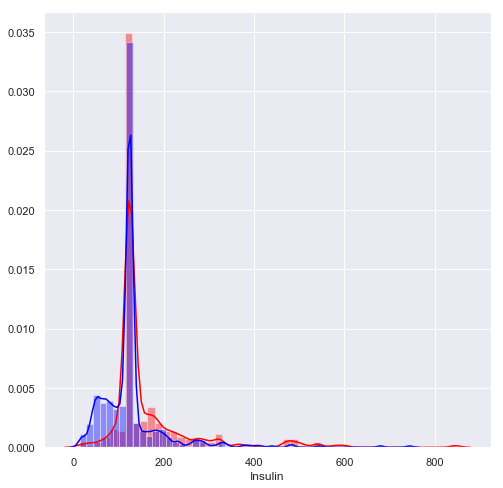

In [34]:
plt.figure(figsize=(8,8))
sns.distplot(data[data['Outcome']==1]['Insulin'].dropna(), color='red')
sns.distplot(data[data['Outcome']==0]['Insulin'].dropna(), color='blue')

In [35]:
# data=data.drop('Insulin', axis=1)

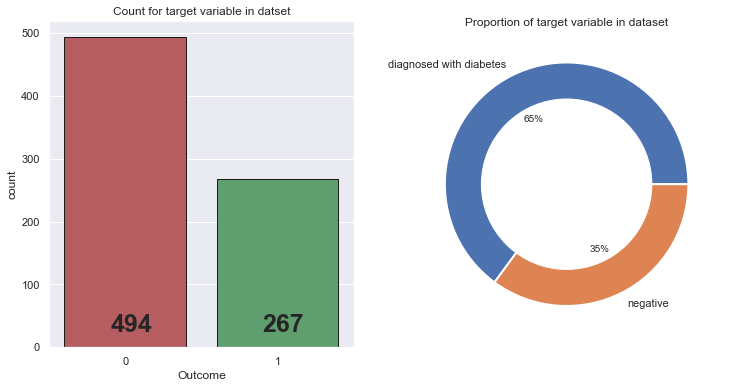

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(x = data['Outcome'],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(data['Outcome'].value_counts().values):
    ax.text(i-0.1,25,j,weight = "bold",fontsize = 25)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data['Outcome'].value_counts().values,
        labels=["diagnosed with diabetes","negative"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)

plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

After we explore the data and fill the missing values, there is 761 data left

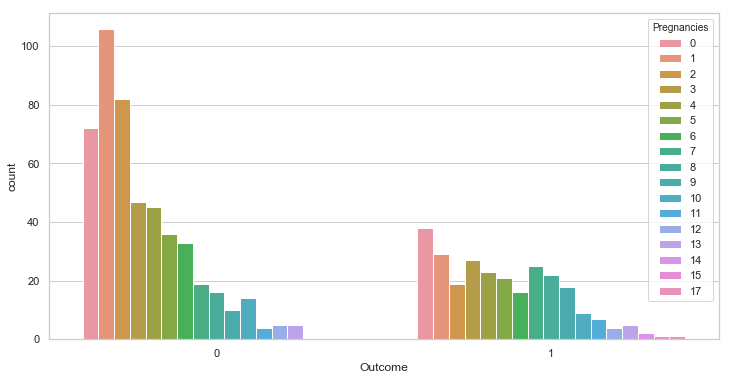

In [37]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='Outcome', data  = data, hue = 'Pregnancies')   

In [38]:
len(data[data['Pregnancies']>9])

57

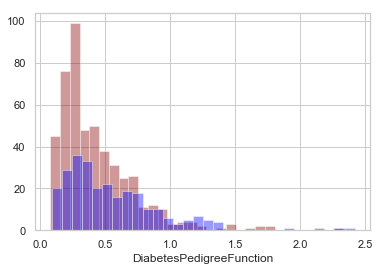

In [39]:
sns.distplot(data[data['Outcome']==0]['DiabetesPedigreeFunction'].dropna(), kde=False, color='darkred', bins=30)
sns.distplot(data[data['Outcome']==1]['DiabetesPedigreeFunction'].dropna(), kde=False, color='blue', bins=30)


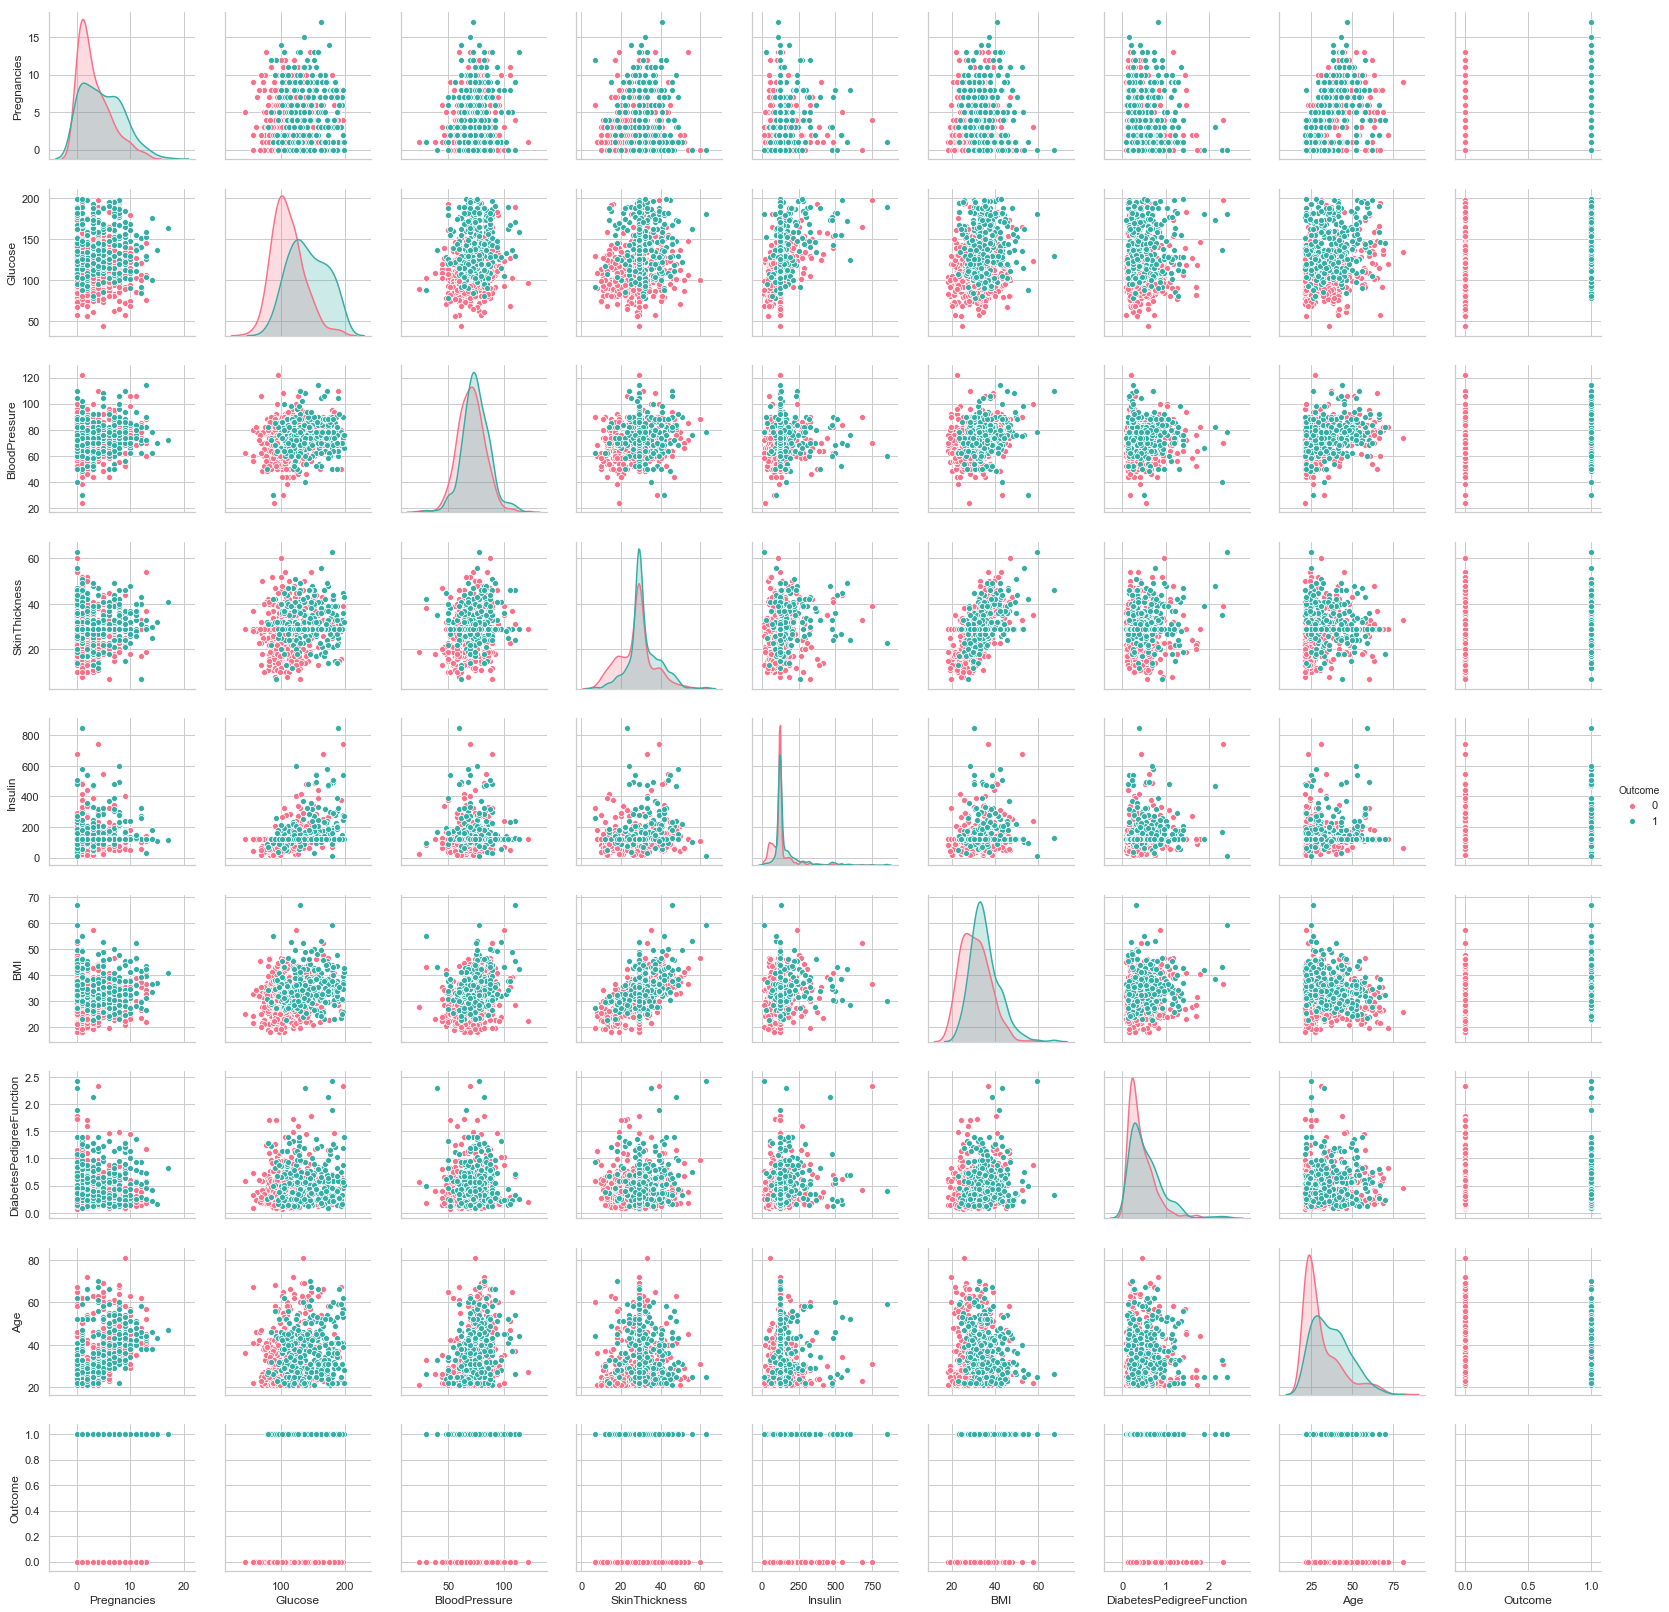

In [40]:
sns.pairplot(data, hue='Outcome', palette="husl") 

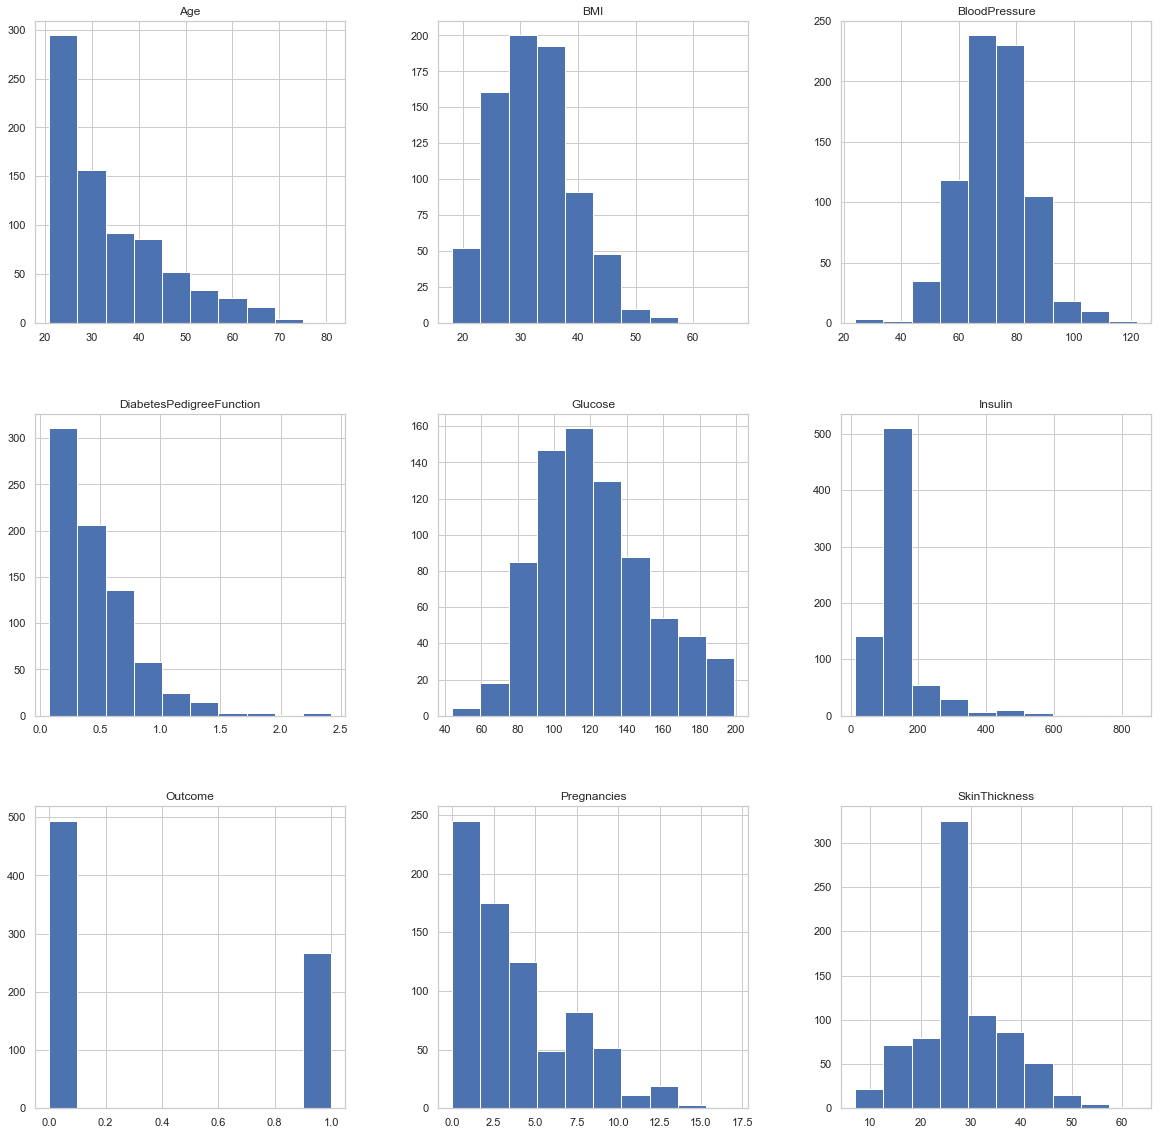

In [41]:
p = data.hist(figsize = (20,20))

In [42]:
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

### **Data Standardization**

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
import joblib
joblib.dump(sc,'scaler')


['scaler']

In [44]:
scaler=joblib.load('scaler')
scaler.transform([[6,148,72,35,60,33.6,0.627,50]])

array([[ 0.64098111,  0.85711926, -0.03486267,  0.70242878, -0.932029  ,
         0.16587112,  0.46083924,  1.41667752]])

In [45]:
standard_x= pd.DataFrame(scaler.transform(x),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'])
standard_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.640981,0.857119,-0.034863,0.702429,-0.182402,0.165871,0.460839,1.416678
1,-0.843458,-1.214372,-0.527505,-0.007291,-0.182402,-0.848276,-0.371165,-0.197359
2,1.234757,2.007948,-0.691719,0.010857,-0.182402,-1.326373,0.596492,-0.112410
3,-0.843458,-1.082849,-0.527505,-0.717010,-0.539916,-0.630958,-0.925834,-1.046852
4,-1.140346,0.495430,-2.662289,0.702429,0.313505,1.542213,5.467935,-0.027461


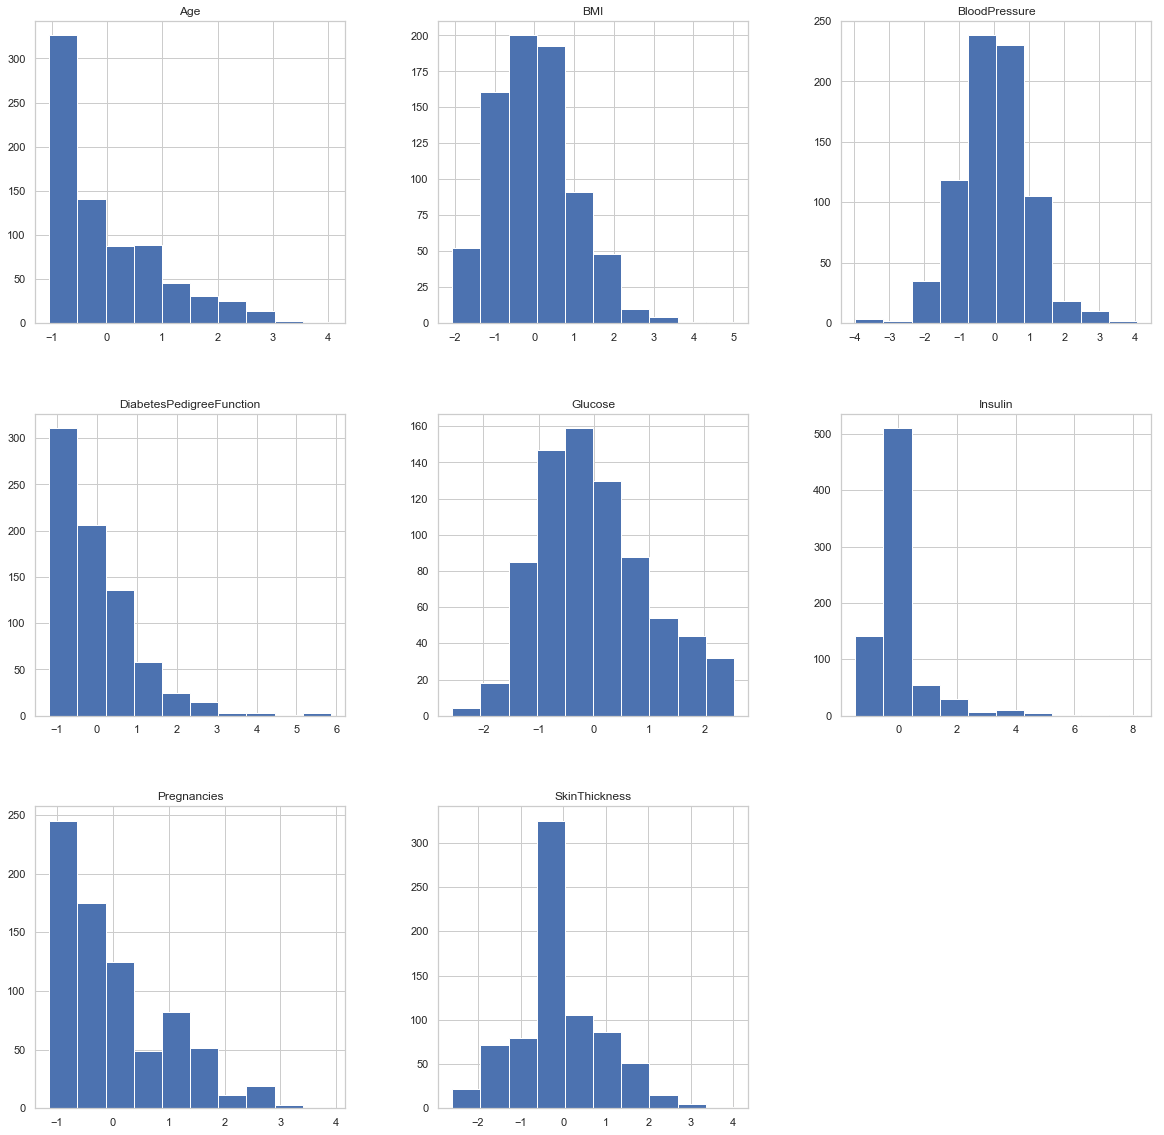

In [46]:
p = standard_x.hist(figsize = (20,20))

### **Splitting Data**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(standard_x,y,test_size=.2, random_state=1)

### *1. Logistic Regression*

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, accuracy_score, matthews_corrcoef, auc, log_loss, f1_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_predicttest = lr.predict(x_test)
con = pd.DataFrame(data = confusion_matrix(y_test,lr_predicttest), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
lr_predictproba=lr.predict_proba(x_test)
print(con)
print('\n')
print(classification_report(y_test,lr_predicttest))
print('ROC AUC : ', roc_auc_score(y_test, lr_predictproba[:,1]))
print('Log Loss : ', log_loss(y_test,lr_predictproba[:,1]))

       P NO  P YES
A NO     85      9
A YES    31     28


              precision    recall  f1-score   support

           0       0.73      0.90      0.81        94
           1       0.76      0.47      0.58        59

    accuracy                           0.74       153
   macro avg       0.74      0.69      0.70       153
weighted avg       0.74      0.74      0.72       153

ROC AUC :  0.852866931121529
Log Loss :  0.46834369917927077


### *2. Random Forest Classifier*

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_predicttest = rfc.predict(x_test)
con = pd.DataFrame(data = confusion_matrix(y_test,rfc_predicttest), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
rfc_predictproba=rfc.predict_proba(x_test)
print(con)
print('\n')
print(classification_report(y_test,rfc_predicttest))
print('ROC AUC :', roc_auc_score(y_test, rfc_predictproba[:,1]))
print('Log Loss : ', log_loss(y_test,rfc_predictproba[:,1]))

       P NO  P YES
A NO     85      9
A YES    25     34


              precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.79      0.58      0.67        59

    accuracy                           0.78       153
   macro avg       0.78      0.74      0.75       153
weighted avg       0.78      0.78      0.77       153

ROC AUC : 0.8374504147133068
Log Loss :  1.0924863575401083


### *3. KNeighborsClassifier*

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_predicttest = knn.predict(x_test)
con = pd.DataFrame(data = confusion_matrix(y_test,knn_predicttest), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
knn_predictproba=knn.predict_proba(x_test)
print(con)
print('\n')
print(classification_report(y_test,knn_predicttest))
print('ROC AUC :', roc_auc_score(y_test, knn_predictproba[:,1]))
print('Log Loss : ', log_loss(y_test,knn_predictproba[:,1]))

       P NO  P YES
A NO     81     13
A YES    25     34


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        94
           1       0.72      0.58      0.64        59

    accuracy                           0.75       153
   macro avg       0.74      0.72      0.73       153
weighted avg       0.75      0.75      0.75       153

ROC AUC : 0.8109448250991705
Log Loss :  1.528273049837231


### *4. Gradient Boosting Classifier*

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_predicttest = gbc.predict(x_test)
con = pd.DataFrame(data = confusion_matrix(y_test,gbc_predicttest), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
gbc_predictproba=gbc.predict_proba(x_test)
print(con)
print('\n')
print(classification_report(y_test,gbc_predicttest))
print('ROC AUC :', roc_auc_score(y_test, gbc_predictproba[:,1]))
print('Log Loss : ', log_loss(y_test,gbc_predictproba[:,1]))

       P NO  P YES
A NO     77     17
A YES    29     30


              precision    recall  f1-score   support

           0       0.73      0.82      0.77        94
           1       0.64      0.51      0.57        59

    accuracy                           0.70       153
   macro avg       0.68      0.66      0.67       153
weighted avg       0.69      0.70      0.69       153

ROC AUC : 0.8131987017670393
Log Loss :  0.5267536187493845


## K-Fold

In [52]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    logloss = log_loss(y_train,predictProba)
    matt = matthews_corrcoef(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss,
        'matthew': matt
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    logloss = log_loss(y_test,predictProba)
    matt = matthews_corrcoef(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss,
        'matthew': matt
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [53]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

### *1. Logistic Regression*

In [54]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(x,y): 
    # split data
    X_train, X_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    # instantiate model
    lr = LogisticRegression()
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lr)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [55]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['logloss'],val['logloss'],tr['matthew'],val['matthew']])

listItem.append(list(np.mean(listItem,axis=0)))
listItem.append(list(np.std(listItem[:10],axis=0)))    
dflr = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss',
                            'Train Matthew Score',
                            'Test Matthew Score'])
listIndex = list(dflr.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'STD'
dflr.index = listIndex
dflr

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss,Train Matthew Score,Test Matthew Score
0,0.757310,0.844156,0.824500,0.910920,0.710110,0.831633,0.490555,0.408684,0.439258,0.664556
1,0.756204,0.802632,0.835622,0.853535,0.719428,0.721612,0.483893,0.441371,0.449787,0.480538
2,0.779562,0.684211,0.846614,0.730655,0.740419,0.642353,0.469538,0.558905,0.495455,0.294398
3,0.772263,0.723684,0.836180,0.828835,0.727742,0.705263,0.477055,0.501562,0.471726,0.423928
4,0.763504,0.776316,0.834481,0.831650,0.726146,0.716106,0.483853,0.462098,0.465693,0.435516
5,0.785401,0.644737,0.848798,0.739130,0.746616,0.584195,0.462865,0.615242,0.507067,0.212496
6,0.769343,0.736842,0.834268,0.861607,0.728022,0.695513,0.476060,0.506141,0.470893,0.410792
7,0.766423,0.802632,0.834579,0.852608,0.725313,0.774123,0.481344,0.468063,0.465341,0.556759
8,0.766423,0.763158,0.835980,0.836957,0.722318,0.725962,0.479839,0.479014,0.460574,0.499875
9,0.762044,0.828947,0.836947,0.795014,0.725478,0.758730,0.485371,0.442296,0.465688,0.521749


### *2. Random Forest Classifier*

In [56]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(x,y): 
    # split data
    X_train, X_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    rfc=RandomForestClassifier()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [57]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['logloss'],val['logloss'],tr['matthew'],val['matthew']])

listItem.append(list(np.mean(listItem,axis=0)))
listItem.append(list(np.std(listItem[:10],axis=0)))    
dfrfc = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss',
                            'Train Matthew Score',
                            'Test Matthew Score'])
listIndex = list(dfrfc.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'STD'
dfrfc.index = listIndex
dfrfc

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss,Train Matthew Score,Test Matthew Score
0,0.982456,0.779221,0.999454,0.844109,0.980513,0.763248,0.140803,0.878874,0.961356,0.526787
1,0.985401,0.736842,0.999527,0.782828,0.984026,0.670996,0.138799,0.491761,0.968233,0.343303
2,0.982482,0.644737,0.999212,0.681920,0.980567,0.593422,0.130031,1.075775,0.961463,0.199049
3,0.983942,0.750000,0.999253,0.856534,0.982057,0.733333,0.139722,0.460615,0.964370,0.480651
4,0.982482,0.776316,0.999411,0.831650,0.980795,0.724344,0.135536,0.855826,0.961911,0.449042
5,0.970803,0.631579,0.999138,0.644928,0.967129,0.563577,0.139000,2.001755,0.935947,0.177237
6,0.983942,0.723684,0.999601,0.821801,0.982169,0.695826,0.138593,0.920883,0.964755,0.394180
7,0.978102,0.763158,0.998787,0.837113,0.975783,0.712121,0.139617,1.303981,0.951814,0.459225
8,0.985401,0.776316,0.998860,0.830435,0.983739,0.749175,0.144531,0.897667,0.967811,0.524357
9,0.982482,0.815789,0.998773,0.815328,0.980937,0.754386,0.136186,0.446157,0.962052,0.508772


### *3. KNN*

In [58]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(standard_x,y): 
    # split data
    X_train, X_val = standard_x.iloc[train_index], standard_x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    # instantiate model
    knn=KNeighborsClassifier()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [59]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['logloss'],val['logloss'],tr['matthew'],val['matthew']])

listItem.append(list(np.mean(listItem,axis=0)))
listItem.append(list(np.std(listItem[:10],axis=0)))    
dfknn = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss',
                            'Train Matthew Score',
                            'Test Matthew Score'])
listIndex = list(dfknn.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'STD'
dfknn.index = listIndex
dfknn

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss,Train Matthew Score,Test Matthew Score
0,0.815789,0.831169,0.890841,0.899066,0.792306,0.823550,0.371496,0.783156,0.586637,0.649811
1,0.811679,0.776316,0.893748,0.807660,0.791730,0.731672,0.369017,1.301091,0.584624,0.463686
2,0.820438,0.697368,0.904798,0.723214,0.800612,0.666857,0.346899,2.257531,0.601557,0.336123
3,0.808759,0.750000,0.896799,0.812855,0.781486,0.742465,0.358763,1.328452,0.566040,0.485200
4,0.821898,0.789474,0.901712,0.797980,0.803228,0.736797,0.358332,1.298467,0.607501,0.475076
5,0.829197,0.684211,0.909316,0.709420,0.805747,0.665444,0.339351,1.877811,0.614646,0.331894
6,0.824818,0.697368,0.898798,0.757812,0.800996,0.660648,0.357990,1.822491,0.605850,0.328131
7,0.821898,0.763158,0.902734,0.801965,0.802435,0.731765,0.354370,1.334161,0.605281,0.468528
8,0.832117,0.697368,0.902016,0.783696,0.811200,0.653656,0.353640,1.799615,0.623633,0.341918
9,0.821898,0.776316,0.898695,0.772853,0.805839,0.706830,0.360563,2.582631,0.611934,0.414039


### *4. Gradient Boosting Clasifier*

In [60]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(x,y): 
    # split data
    X_train, X_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    # instantiate model
    gbc=GradientBoostingClassifier()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, gbc)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [61]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['logloss'],val['logloss'],tr['matthew'],val['matthew']])

listItem.append(list(np.mean(listItem,axis=0)))
listItem.append(list(np.std(listItem[:10],axis=0)))    
dfgbc = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss',
                            'Train Matthew Score',
                            'Test Matthew Score'])
listIndex = list(dfgbc.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'STD'
dfgbc.index = listIndex
dfgbc
# dfgbc.loc['Average']['Test Accuracy']

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss,Train Matthew Score,Test Matthew Score
0,0.910819,0.857143,0.973989,0.917385,0.899781,0.846808,0.259396,0.358974,0.801295,0.693940
1,0.915328,0.750000,0.977681,0.840067,0.906076,0.700104,0.248990,0.453129,0.814035,0.400532
2,0.919708,0.671053,0.980609,0.723958,0.910473,0.637888,0.236535,0.613076,0.821754,0.278065
3,0.913869,0.776316,0.978818,0.823153,0.902268,0.764534,0.246266,0.532948,0.806695,0.536327
4,0.925547,0.802632,0.978497,0.845118,0.917824,0.756774,0.247875,0.448970,0.836712,0.513922
5,0.927007,0.631579,0.979280,0.700000,0.917641,0.590769,0.234682,0.688958,0.837257,0.196813
6,0.906569,0.750000,0.975683,0.829613,0.893864,0.719666,0.254170,0.512549,0.792104,0.446884
7,0.918248,0.789474,0.977266,0.864701,0.908163,0.761569,0.249115,0.453904,0.818667,0.528373
8,0.912409,0.710526,0.976238,0.858696,0.900498,0.672157,0.251332,0.497680,0.804307,0.373224
9,0.921168,0.789474,0.976785,0.818098,0.913578,0.728571,0.253608,0.429041,0.828066,0.458682


In [62]:
listDF=[dflr,dfrfc,dfknn,dfgbc]

listmetrics=['Train Accuracy', 'Train ROC AUC', 'Train F1 Score', 'Train Log Loss', 'Train Matthew Score']
stat=['Average', 'STD']
listmerge=[]
for i in stat :
    for j in listmetrics:
        listmerge.append((i,j))

listitem_=[]
for i in listDF:
    liststep=[]
    for j in listmerge:
        liststep.append(i.loc[j[0]][j[1]])
    listitem_.append(liststep)
    
dfEval=pd.DataFrame(listitem_)
dfEval.index = ['LR','RFC', 'KNN', 'GBC']
dfEval.columns = ['Accuracy Avg', 'Accuracy Std', 'ROC AUC Avg', 'ROC AUC Std', 
                'F1 Avg', 'F1 Std', 'Log Loss Avg', 'Log Loss Std', 'Matthew Avg', 'Mathew Std' ]
print('Train Evaluation')
dfEval
# print(list(zip(stat, listmetrics)))
# print(listmerge)
# print(listitem_)

Train Evaluation


,Accuracy Avg,Accuracy Std,ROC AUC Avg,ROC AUC Std,F1 Avg,F1 Std,Log Loss Avg,Log Loss Std,Matthew Avg,Mathew Std
LR,0.767848,0.836797,0.727159,0.479037,0.469148,0.008777,0.006409,0.009678,0.007682,0.018761
RFC,0.981749,0.999202,0.979772,0.138282,0.959971,0.004142,0.000292,0.004734,0.003608,0.009099
KNN,0.820849,0.899946,0.799558,0.357042,0.600770,0.006868,0.005105,0.008238,0.008971,0.016120
GBC,0.917067,0.977485,0.907017,0.248197,0.816089,0.006165,0.001827,0.007598,0.007240,0.014426


In [63]:
listDF=[dflr,dfrfc,dfknn,dfgbc]

listmetrics=['Test Accuracy', 'Test ROC AUC', 'Test F1 Score', 'Test Log Loss', 'Test Matthew Score']
stat=['Average', 'STD']
listmerge=[]
for i in stat :
    for j in listmetrics:
        listmerge.append((i,j))

listitem_=[]
for i in listDF:
    liststep=[]
    for j in listmerge:
        liststep.append(i.loc[j[0]][j[1]])
    listitem_.append(liststep)
    
dfEval=pd.DataFrame(listitem_)
dfEval.index = ['LR','RFC', 'KNN', 'GBC']
dfEval.columns = ['Accuracy Avg', 'Accuracy Std', 'ROC AUC Avg', 'ROC AUC Std', 
                'F1 Avg', 'F1 Std', 'Log Loss Avg', 'Log Loss Std', 'Matthew Avg', 'Mathew Std' ]
print('Test Evaluation')
dfEval

Test Evaluation


,Accuracy Avg,Accuracy Std,ROC AUC Avg,ROC AUC Std,F1 Avg,F1 Std,Log Loss Avg,Log Loss Std,Matthew Avg,Mathew Std
LR,0.760731,0.824091,0.715549,0.488338,0.450061,0.060520,0.052599,0.064835,0.057821,0.122085
RFC,0.739764,0.794664,0.696043,0.933329,0.406260,0.056269,0.068672,0.064730,0.443326,0.121922
KNN,0.746275,0.786652,0.711968,1.638541,0.429441,0.047122,0.050147,0.050037,0.504133,0.096353
GBC,0.752820,0.822079,0.717884,0.498923,0.442676,0.063082,0.061400,0.068775,0.090320,0.133695


## Deployment Model

In [64]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV( estimator = gbc,
                      param_grid = {
                          'learning_rate':[0.1,0.3,0.5],
                          'n_estimators':[100,200,300],
                          'min_samples_split': [2,5,10],
                          'min_samples_leaf':[15,20,25],
                          'max_depth':[2,3,5]
                      }, scoring = 'recall',
                      cv = 5,
                      n_jobs = -1
)

In [65]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=100)
search.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  random_state=None,

In [66]:
search.best_params_
# {'learning_rate': 0.3,
#  'max_depth': 5,
#  'min_samples_leaf': 20,
#  'min_samples_split': 2,
#  'n_estimators': 100}

{'learning_rate': 0.3,
 'max_depth': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 200}

In [67]:
gbc=search.best_estimator_

### *Train Error*

In [68]:
predictproba_train=gbc.predict_proba(x_train)
predictproba_train
predictions_train=[]
for pred in predictproba_train[:,0]:
    if (pred > 0.5):
        predictions_train.append(0)
    else:
        predictions_train.append(1)


In [69]:
con = pd.DataFrame(data = confusion_matrix(y_train,predictions_train), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
print(con)
print('\n')
print(classification_report(y_train,predictions_train))
print('ROC AUC :', roc_auc_score(y_train, predictproba_train[:,1]))
print('Log Loss : ', log_loss(y_train, predictproba_train[:,1]))

       P NO  P YES
A NO    371      0
A YES     0    199


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       199

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

ROC AUC : 1.0
Log Loss :  0.04207769054120387


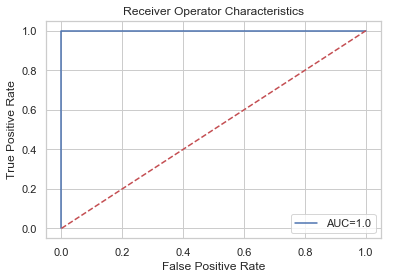

In [70]:
preds = predictproba_train[:,1]
fpr,tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operator Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC={}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### *Test Error*

In [91]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predictproba_test=gbc.predict_proba(x_test)
predictproba_test
predictions_test=[]
for pred in predictproba_test[:,0]:
    if (pred > 0.97):
        predictions_test.append(0)
    else:
        predictions_test.append(1)

In [92]:
con = pd.DataFrame(data = confusion_matrix(y_test,predictions_test), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
print(con)
print('\n')
print(classification_report(y_test,predictions_test))
print('ROC AUC :', roc_auc_score(y_test, predictproba_test[:,1]))
print('Log Loss : ', log_loss(y_test, predictproba_test[:,1]))

       P NO  P YES
A NO     22    101
A YES     2     66


              precision    recall  f1-score   support

           0       0.92      0.18      0.30       123
           1       0.40      0.97      0.56        68

    accuracy                           0.46       191
   macro avg       0.66      0.57      0.43       191
weighted avg       0.73      0.46      0.39       191

ROC AUC : 0.8188665710186513
Log Loss :  0.5061537512234084


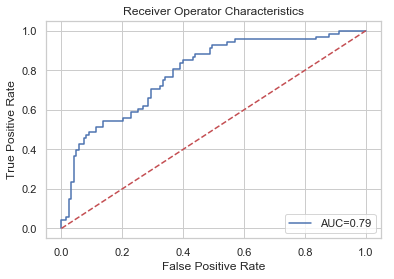

In [73]:
preds = predictproba_test[:,1]
fpr,tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operator Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC={}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

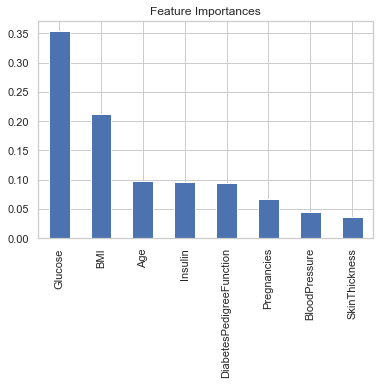

In [74]:
coef1=pd.Series(gbc.feature_importances_, x_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title = 'Feature Importances')

In [75]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01626016 0.01626016 0.02439024
 0.02439024 0.03252033 0.03252033 0.04065041 0.04065041 0.04878049
 0.04878049 0.05691057 0.05691057 0.07317073 0.07317073 0.08130081
 0.08130081 0.08943089 0.08943089 0.11382114 0.11382114 0.13821138
 0.13821138 0.20325203 0.20325203 0.22764228 0.22764228 0.25203252
 0.25203252 0.26829268 0.26829268 0.28455285 0.28455285 0.29268293
 0.29268293 0.32520325 0.32520325 0.33333333 0.33333333 0.34146341
 0.34146341 0.36585366 0.36585366 0.3902439  0.3902439  0.39837398
 0.39837398 0.43089431 0.43089431 0.43902439 0.43902439 0.48780488
 0.48780488 0.49593496 0.49593496 0.54471545 0.54471545 0.56910569
 0.56910569 0.83739837 0.83739837 0.87804878 0.87804878 0.91056911
 0.91056911 1.        ]
[0.         0.01470588 0.04411765 0.04411765 0.05882353 0.05882353
 0.14705882 0.14705882 0.23529412 0.23529412 0.36764706 0.36764706
 0.39705882 0.39705882 0.42647059 0.42647059 0.45588235 0.45588235
 0.47058824 0.47058824 0.48529412 0.48

In [76]:
# gbc.fit(x,y)
# joblib.dump(gbc,'model')

## Conclusions
- The most significant features are Glucose, BMI, and DiabetesPedigreeFunction
- The higher glucose concentration and BMI index on someone, the highest possibility of them developing diabetes type 2
- Person with family history of diabetes has a higher risk diagnose with diabetes
- SkinThickness which have a higher correlation with outcome turns out one of the least important features.
- Model Gradient Boosting has the most stable model, and able to classify diabetes with good sensitivity for positive class